In [1]:
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'

In [3]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
# 표준화작업
train_scaled = train_input/255.0
# train_scaled = train_scaled.reshape(-1,28*28)  # flatten층에서 사이즈 그대로 적용 28*28(배열화)
train_scaled.shape

(60000, 28, 28)

In [5]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [6]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# epochs 돌 때마다 loss, accuracy값을 저장
# train_scaled, val_scaled 함께 훈련시킴
history = model.fit(train_scaled, train_target,epochs=20, 
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7639 - loss: 0.6835 - val_accuracy: 0.8447 - val_loss: 0.4376
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8545 - loss: 0.4068 - val_accuracy: 0.8559 - val_loss: 0.3921
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8695 - loss: 0.3603 - val_accuracy: 0.8562 - val_loss: 0.3952
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8787 - loss: 0.3319 - val_accuracy: 0.8727 - val_loss: 0.3560
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8856 - loss: 0.3067 - val_accuracy: 0.8779 - val_loss: 0.3453
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8933 - loss: 0.2902 - val_accuracy: 0.8775 - val_loss: 0.3460
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8963 - loss: 0.2767 - val_accuracy: 0.8763 - val_loss: 0.3368
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9033 - loss: 0.2613 - 

Text(0, 0.5, '손실률(loss)')

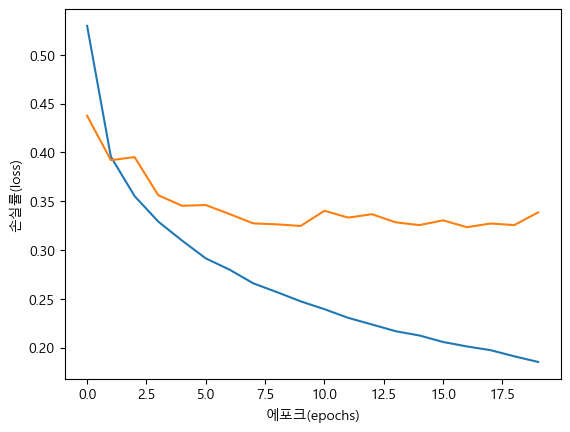

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')

## 콜백

In [10]:
# 손실률이 가장 낮은 위치의 모델을 저장시켜줌
# 확장자 h5, keras확장자명 변경
# epochs 를 20번 돌 때 가장 좋은 모델을 저장시켜줌
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
history = model.fit(train_scaled, train_target, epochs=20, 
                    validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9338 - loss: 0.1802 - val_accuracy: 0.8791 - val_loss: 0.3701
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9334 - loss: 0.1775 - val_accuracy: 0.8893 - val_loss: 0.3415
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9380 - loss: 0.1707 - val_accuracy: 0.8890 - val_loss: 0.3456
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9376 - loss: 0.1681 - val_accuracy: 0.8900 - val_loss: 0.3500
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9419 - loss: 0.1576 - val_accuracy: 0.8836 - val_loss: 0.3644
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9401 - loss: 0.1579 - val_accuracy: 0.8864 - val_loss: 0.3610
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9401 - loss: 0.1607 - val_accuracy: 0.8917 - val_loss: 0.3562
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9431 - loss: 0.1523 - 

In [ ]:
model = keras.load_weights('best_model.keras')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.evaluate(val_scaled,val_target)  

### 조기종료

In [ ]:
# 11번째가 가장 좋을 때 20번째까지 실행을 시킬 필요가 없음

# ModelCheckpoint : 가장 손실률이 낮은 모델을 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
# 조기종료
# patience = 2 : 손실값이 2번째 되는 때 stop
# restore_best_weights=True :  뒤로 back, 가장 좋은 모델의 위치로 이동
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, 
                    validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])